<center><span style="font-size: 60px;">Analysis Movie Dataset (Metacritic)</span></center>

# What is Metacritic?
[Metacritic](https://www.metacritic.com/) is a website that aggregates reviews of films, television shows, music albums, video games, and formerly books.

# Dataset Description

- **Source :** [Kaggle](https://www.kaggle.com/datasets/kashifsahil/16000-movies-1910-2024-metacritic/data)


This dataset contains detailed information on over 16,000 movies released between 1970 and 2024 (from Metacritic website), along with their corresponding Metacritic ratings, also called **USER SCORE**. The dataset is an extensive collection for film enthusiasts, researchers, and data scientists interested in exploring trends in cinema over more than a century.

<b> Key Features:</b>
<ul>
    <li><b>Title:</b> The name of the movie.</li>
    <li><b>Release date:</b> The official release date of the movie.</li>
    <li><b>Description:</b> A brief synopsis or critical overview of the film.</li>
    <li><b>Rating:</b> The average Metacritic score, providing an indication of the movie's critical reception.</li>
    <li><b>Number of Persons Voted:</b> The number of individuals who rated the movie on Metacritic.</li>
    <li><b>Directed by:</b> The director(s) of the movie.</li>
    <li><b>Written by:</b> The screenwriter(s) responsible for the movie's script.</li>
    <li><b>Duration:</b> The runtime of the movie.</li>
    <li><b>Genres:</b> The genre(s) the movie falls under, such as a Drama, Comedy, or Action.</li>
</ul>

**Note:** In Metacritic website, each product has two different ratings: the **METASCORE** (a score out of 100) and the **USER SCORE** (a score out of 10). For each product, the scores of each review are averaged (a weighted average) to form the METASCORE. In our dataset, we only have the USER SCORE ("Rating" column), which corresponds to a classic arithmetic average.

# Objectives
<ul>
    <li><b>Trends in movie ratings</b> over time.</li>
    <li><b>Genre popularity</b> and evolution across decades</li>
    <li><b>Global cinema trends</b> with diverse genres and filmmakers.</li>
</ul>

# Table of Contents 

- [1 - Import libraries](#1---import-libraries)

- [2 - Download the dataset](#2---download-the-dataset)

- [3 - Data Cleaning](#3---data-cleaning)

    - [3.1 - Missing Values](Movies_1910_2024.ipynb#31--missing-values)
        - [3.1.1 - Missing values for "Rating" and "Nb_Votes"](#311---missing-values-for-rating-and-nb_votes)
        - [3.1.2 - Missing values for "Written by"](#312---missing-values-for-written-by)
        - [3.1.3 - Missing values for "Directed by"](#313---missing-values-for-directed-by)
        - [3.1.4 - Missing values for "Genres"](#314---missing-values-for-genres)
        - [3.1.5 - Missing values for "Duration"](#315---missing-values-for-duration)
    - [3.2 - Remove Duplicates](#32---remove-duplicates)
    - [3.3 - Data Types](#33---data-types)
    - [3.4 - Outliers](#34---outliers)
- [4 - Data Manipulation](#4---data-manipulation)
    - [4.1 - "Genres" column](#41---genres-column)
    - [4.2 - "Directed by" & "Written by" columns](#42---directed-by--written-by-columns)
    - [4.3 - Rating weighting](#43---rating-weighting)
- [5 - Exploratory Data Analysis](#5---exploratory-data-analysis)
    - [5.1 - Data distribution](#51---data-distribution)
        - [5.1.1 - Distribution of Rating](#511---distribution-of-rating)
        - [5.1.2 - Distribution of Duration](#512---distribution-of-duration)
    - [5.2 - Evolution of the number of votes](#52---evolution-of-the-number-of-votes)
    - [5.3 - Trends in movie ratings over time](#53---trends-in-movie-ratings-over-time)
    - [5.4 - Analysis of movie genres](#54---analysis-of-movie-genres)
        - [5.4.1 - Genre popularity all years combined](#541---genre-popularity-all-years-combined)
        - [5.4.2 - Genre popularity across decades](#542-genre-popularity-across-decades)
        - [5.4.3 - Number of movies released by genre all years combined](#543---number-of-movies-released-by-genre-all-years-combined)
        - [5.4.4 - Number of films released by genre across decades](#544-number-of-films-released-by-genre-across-decades)
    - [5.5 - Analysis by directors/writers](#55---analysis-by-directorswriters)
        - [5.5.1 - Calculate the average rating by director and writer as well as the number of films](#551---calculate-the-average-rating-by-director-and-writer-as-well-as-the-number-of-films)
        - [5.5.2 - Analysis of rating distribution](#552---analysis-of-rating-distribution)
        - [5.5.3 - Analysis of duration distribution](#553---analysis-of-duration-distribution)
- [6 - Correlation Analysis](#6---correlation-analysis)
- [7 - Download the cleaned dataframe](#7---download-the-cleaned-dataframe)
- [8 - Dashboard with Tableau](#8---dashboard-with-tableau)
- [9 - Conclusion](#9---conclusion)      
        
    
        
    
    
    
        
    

    
        
        
    
    
    
        
        
        

# 1 - Import libraries

In [1]:
# Uncomment and run the following two lines only if you are using JupyterLab. Otherwise run the following command in your terminal: pip install nbformat plotly

#import piplite
#await piplite.install(['nbformat', 'plotly'])

In [2]:
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from scipy import stats
from bs4 import BeautifulSoup
from scipy.stats import pearsonr
import time
import requests
import re

# 2 - Download the dataset 

In [4]:
df = pd.read_csv("16k_Movies.csv")
df.head()

,Unnamed: 0,Title,Release Date,Description,Rating,No of Persons Voted,Directed by,Written by,Duration,Genres
0,0,Dekalog (1988),"Mar 22, 1996",This masterwork by Krzysztof Kieślowski is one...,7.4,118,Krzysztof Kieslowski,"Krzysztof Kieslowski, Krzysztof Piesiewicz",9 h 32 m,Drama
1,1,Three Colors: Red,"Nov 23, 1994",Krzysztof Kieslowski closes his Three Colors t...,8.3,241,Krzysztof Kieslowski,"Krzysztof Kieslowski, Krzysztof Piesiewicz, Ag...",1 h 39 m,"Drama,Mystery,Romance"
2,2,The Conformist,"Oct 22, 1970","Set in Rome in the 1930s, this re-release of B...",7.3,106,Bernardo Bertolucci,"Alberto Moravia, Bernardo Bertolucci",1 h 47 m,Drama
3,3,Tokyo Story,"Mar 13, 1972",Yasujiro Ozu’s Tokyo Story follows an aging co...,8.1,147,Yasujirô Ozu,"Kôgo Noda, Yasujirô Ozu",2 h 16 m,Drama
4,4,The Leopard (re-release),"Aug 13, 2004","Set in Sicily in 1860, Luchino Visconti's spec...",7.8,85,Luchino Visconti,"Giuseppe Tomasi di Lampedusa, Suso Cecchi D'Am...",3 h 7 m,"Drama,History"


In [5]:
df.shape

(16290, 10)

# 3 - Data Cleaning


In [6]:
df.head()

,Unnamed: 0,Title,Release Date,Description,Rating,No of Persons Voted,Directed by,Written by,Duration,Genres
0,0,Dekalog (1988),"Mar 22, 1996",This masterwork by Krzysztof Kieślowski is one...,7.4,118,Krzysztof Kieslowski,"Krzysztof Kieslowski, Krzysztof Piesiewicz",9 h 32 m,Drama
1,1,Three Colors: Red,"Nov 23, 1994",Krzysztof Kieslowski closes his Three Colors t...,8.3,241,Krzysztof Kieslowski,"Krzysztof Kieslowski, Krzysztof Piesiewicz, Ag...",1 h 39 m,"Drama,Mystery,Romance"
2,2,The Conformist,"Oct 22, 1970","Set in Rome in the 1930s, this re-release of B...",7.3,106,Bernardo Bertolucci,"Alberto Moravia, Bernardo Bertolucci",1 h 47 m,Drama
3,3,Tokyo Story,"Mar 13, 1972",Yasujiro Ozu’s Tokyo Story follows an aging co...,8.1,147,Yasujirô Ozu,"Kôgo Noda, Yasujirô Ozu",2 h 16 m,Drama
4,4,The Leopard (re-release),"Aug 13, 2004","Set in Sicily in 1860, Luchino Visconti's spec...",7.8,85,Luchino Visconti,"Giuseppe Tomasi di Lampedusa, Suso Cecchi D'Am...",3 h 7 m,"Drama,History"


In [7]:
# Dropping the first column (this is the index column)
df.drop("Unnamed: 0", axis=1, inplace = True)
df.head()

,Title,Release Date,Description,Rating,No of Persons Voted,Directed by,Written by,Duration,Genres
0,Dekalog (1988),"Mar 22, 1996",This masterwork by Krzysztof Kieślowski is one...,7.4,118,Krzysztof Kieslowski,"Krzysztof Kieslowski, Krzysztof Piesiewicz",9 h 32 m,Drama
1,Three Colors: Red,"Nov 23, 1994",Krzysztof Kieslowski closes his Three Colors t...,8.3,241,Krzysztof Kieslowski,"Krzysztof Kieslowski, Krzysztof Piesiewicz, Ag...",1 h 39 m,"Drama,Mystery,Romance"
2,The Conformist,"Oct 22, 1970","Set in Rome in the 1930s, this re-release of B...",7.3,106,Bernardo Bertolucci,"Alberto Moravia, Bernardo Bertolucci",1 h 47 m,Drama
3,Tokyo Story,"Mar 13, 1972",Yasujiro Ozu’s Tokyo Story follows an aging co...,8.1,147,Yasujirô Ozu,"Kôgo Noda, Yasujirô Ozu",2 h 16 m,Drama
4,The Leopard (re-release),"Aug 13, 2004","Set in Sicily in 1860, Luchino Visconti's spec...",7.8,85,Luchino Visconti,"Giuseppe Tomasi di Lampedusa, Suso Cecchi D'Am...",3 h 7 m,"Drama,History"


In [8]:
# Rename "No of Persons Voted" column by "Nb_Votes"
df = df.rename(columns={"No of Persons Voted": "Nb_Votes"})

## 3.1 -Missing Values

In [9]:
missing_data = df.isnull()

# Count missing values in each column
for column in missing_data.columns:
    non_missing_count = missing_data[column].value_counts().get(False,0)
    missing_count = missing_data[column].value_counts().get(True, 0)

    print(f"{column}")
    print(f"Non-missing values: {non_missing_count}")
    print(f"Missing values: {missing_count}")
    print("Proportion of missing values =",round(missing_data[column].mean()*100,2), "%")
    
    print("")    

Title
Non-missing values: 16290
Missing values: 0
Proportion of missing values = 0.0 %

Release Date
Non-missing values: 16290
Missing values: 0
Proportion of missing values = 0.0 %

Description
Non-missing values: 16290
Missing values: 0
Proportion of missing values = 0.0 %

Rating
Non-missing values: 12846
Missing values: 3444
Proportion of missing values = 21.14 %

Nb_Votes
Non-missing values: 12829
Missing values: 3461
Proportion of missing values = 21.25 %

Directed by
Non-missing values: 16283
Missing values: 7
Proportion of missing values = 0.04 %

Written by
Non-missing values: 15327
Missing values: 963
Proportion of missing values = 5.91 %

Duration
Non-missing values: 16277
Missing values: 13
Proportion of missing values = 0.08 %

Genres
Non-missing values: 16285
Missing values: 5
Proportion of missing values = 0.03 %



Based on the summary above, each column has 16 290 rows of data and six of the columns containing missing data:
<ol>
    <li>"Rating": 3 444 missing data</li>
    <li>"Nb_Votes": 3 461 missing data</li>
    <li>"Directed by": 7 missing data</li>
    <li>"Written by": 963 missing data</li>
    <li>"Duration": 13 missing data</li>
    <li>"Genres": 5 missing data</li>
</ol>

The "Nb_Votes" and "Rating" columns contain approximately 21% missing values, which is significant. Removing all missing rows could therefore significantly reduce the sample size and, potentially, introduce bias into the analyses.

### 3.1.1 - Missing values for "Rating" and "Nb_Votes"

Let's try imputation of missing values ​​for the "Rating" and "Nb_Votes" columns. 

First, let's look at the type of this data.

In [10]:
df.dtypes

Title            object
Release Date     object
Description      object
Rating          float64
Nb_Votes         object
Directed by      object
Written by       object
Duration         object
Genres           object
dtype: object

Note that the “Nb_Votes” column is not in numerical format. Let's convert the values ​​of this column to floats.

In [11]:
# Convert "Nb_Votes" in integer
df['Nb_Votes'] = df['Nb_Votes'].replace({',': ''}, regex=True).astype(float)

df.dtypes

Title            object
Release Date     object
Description      object
Rating          float64
Nb_Votes        float64
Directed by      object
Written by       object
Duration         object
Genres           object
dtype: object

Now, let's look at the distribution of this data to see whether it is better to impute using the mean or the median.


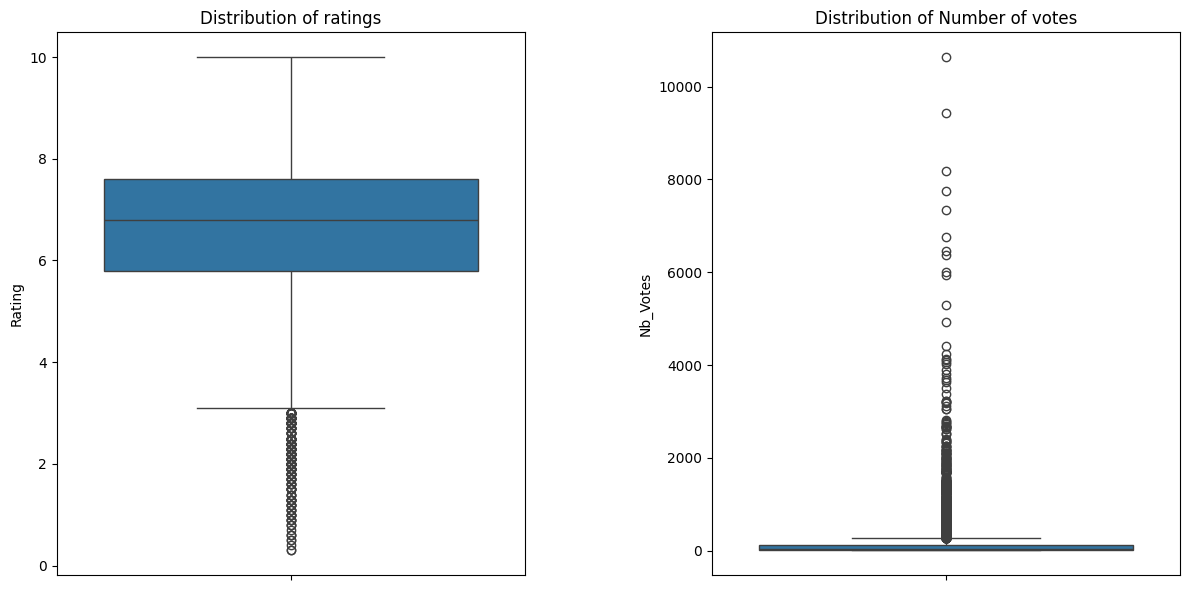

In [12]:
# Create 2 boxplots to visualize the distribution of "Rating" and "Nb_Votes".

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Boxplot of ratings
sns.boxplot(data=df["Rating"], ax=axes[0])
axes[0].set_title("Distribution of ratings")

# Boxplot of No of Persons Voted
sns.boxplot(data=df["Nb_Votes"], ax=axes[1])
axes[1].set_title("Distribution of Number of votes")

plt.tight_layout()
plt.subplots_adjust(wspace=0.4)
plt.show()

The distribution of ratings seems rather symmetrical, unlike the distribution of the Number of Votes. To impute missing values ​​from the “Nb_Votes” column, we will therefore use the median. Concerning the imputation of missing values ​​from the "Rating" column, the choice of the mean or the median is almost equivalent as shown in the following result.


In [13]:
# Median of "Rating" column 
print("Median of 'Rating' column =", df["Rating"].median())

# Mean of "Rating" column
print("Mean of 'Rating' column =", df["Rating"].mean())


Median of 'Rating' column = 6.8
Mean of 'Rating' column = 6.617631947687997


In [14]:
# Imputation with median
df.fillna({"Rating": df["Rating"].median()}, inplace=True)
df.fillna({"Nb_Votes":df["Nb_Votes"].median()}, inplace=True)

In [15]:
missing_data = df.isnull()

# Count missing values in each column
for column in missing_data.columns:
    non_missing_count = missing_data[column].value_counts().get(False,0)
    missing_count = missing_data[column].value_counts().get(True, 0)

    print(f"{column}")
    print(f"Non-missing values: {non_missing_count}")
    print(f"Missing values: {missing_count}")
    print("Proportion of missing values =", round(missing_data[column].mean()*100,2), "%")
    
    print("")  

Title
Non-missing values: 16290
Missing values: 0
Proportion of missing values = 0.0 %

Release Date
Non-missing values: 16290
Missing values: 0
Proportion of missing values = 0.0 %

Description
Non-missing values: 16290
Missing values: 0
Proportion of missing values = 0.0 %

Rating
Non-missing values: 16290
Missing values: 0
Proportion of missing values = 0.0 %

Nb_Votes
Non-missing values: 16290
Missing values: 0
Proportion of missing values = 0.0 %

Directed by
Non-missing values: 16283
Missing values: 7
Proportion of missing values = 0.04 %

Written by
Non-missing values: 15327
Missing values: 963
Proportion of missing values = 5.91 %

Duration
Non-missing values: 16277
Missing values: 13
Proportion of missing values = 0.08 %

Genres
Non-missing values: 16285
Missing values: 5
Proportion of missing values = 0.03 %



After imputation, missing values ​​in "Rating" and "Nb_Votes" were removed. There are still missing values ​​in the following columns:
<ul>
    <li>Written by: 5.91%</li>
    <li>Duration: 0.08%</li>
    <li>Directed by: 0.04%</li>
    <li>Genres: 0.03%</li>
</ul>




### 3.1.2 - Missing values for "Written by"

For the "Written by" column, replace the missing values ​​with "Unknown".


In [16]:
df.fillna({"Written by": "Unknown"}, inplace=True)

Since there are very few films with missing values ​​for the three columns "Duration", "Directed by" and "Genres", we will perform an internet search for each of these films to replace these missing values.

### 3.1.3 - Missing values for "Directed by"

In [17]:
# Print movies with missing values in "Directed by" column
df[df["Directed by"].isnull()]

,Title,Release Date,Description,Rating,Nb_Votes,Directed by,Written by,Duration,Genres
155,Apocalypse Now Redux,"Aug 3, 2001","During the Vietnam War, Captain Willard is sen...",8.2,89.0,NaN,Unknown,NaN,NaN
2623,The Harder They Come,"Feb 8, 1973","Reggae superstar Jimmy Cliff is Ivan, a rural ...",6.8,31.0,NaN,Chris Salewicz,1 h 45 m,"Crime,Drama,Music"
2999,The Animation Show 2005,"Feb 18, 2005",A collection of the world's best animated shor...,6.8,31.0,NaN,Unknown,1 h 25 m,Animation
3004,The Godfather Coda: The Death of Michael Corleone,"Dec 4, 2020",Celebrating the 30th Anniversary of The Godfat...,7.9,47.0,NaN,Unknown,\n http://www.thegodfather.com/\n,NaN
7417,The Cotton Club Encore,"Oct 11, 2019","In this lavish, 1930s-era drama, Harlem's lege...",6.8,31.0,NaN,Unknown,\n https://www.lionsgate.com/movies/the...,NaN
10965,Once Upon a Deadpool,"Dec 12, 2018",A Deadpool fairy tale that gives zero F’s.,4.8,36.0,NaN,Unknown,\n https://www.foxmovies.com/movies/onc...,NaN
16285,Boys to Men,"Apr 27, 2001",Compilation of 4 short films from different di...,6.8,31.0,NaN,Unknown,\n https://www.amazon.com/Boys-Men-Phil...,Drama


Let's do an internet search for each of the films above to find the director of the movies and manually replace it in the "Directed by" column: 
<ol>
    <li>"Apocalypse Now Redux": Francis Ford Coppola </li>
    <li>"The Harder They Come": Perry Henzell</li>
    <li>"The Animation Show 2005": Mike Judge</li>
    <li>"The Godfather Coda: The Death of Michael Corleone": Francis Ford Coppola</li>
    <li>"The Cotton Club Encore": Francis Ford Coppola</li>
    <li>"Once Upon a Deadpool": David Leitch</li>
    <li>"Boys to Men": Duncan Tucker</li>   
</ol>

In [18]:
# We add the director of the 7 movies above

# List of indexes to modify
index_list = [155, 2623, 2999, 3004, 7417, 10965, 16285]

# New directors to assign
directors = ["Francis Ford Coppola", "Perry Henzell", "Mike Judge", "Francis Ford Coppola", "Francis Ford Coppola", "David Leitch", "Duncan Tucker"]

# Replace the values of the 'Directed by' column
df.loc[index_list, "Directed by"] = directors

### 3.1.4 - Missing values for "Genres"

In [19]:
# Print movies with missing values in "Genres" column
df[df["Genres"].isnull()]

,Title,Release Date,Description,Rating,Nb_Votes,Directed by,Written by,Duration,Genres
155,Apocalypse Now Redux,"Aug 3, 2001","During the Vietnam War, Captain Willard is sen...",8.2,89.0,Francis Ford Coppola,Unknown,NaN,NaN
3004,The Godfather Coda: The Death of Michael Corleone,"Dec 4, 2020",Celebrating the 30th Anniversary of The Godfat...,7.9,47.0,Francis Ford Coppola,Unknown,\n http://www.thegodfather.com/\n,NaN
7417,The Cotton Club Encore,"Oct 11, 2019","In this lavish, 1930s-era drama, Harlem's lege...",6.8,31.0,Francis Ford Coppola,Unknown,\n https://www.lionsgate.com/movies/the...,NaN
10965,Once Upon a Deadpool,"Dec 12, 2018",A Deadpool fairy tale that gives zero F’s.,4.8,36.0,David Leitch,Unknown,\n https://www.foxmovies.com/movies/onc...,NaN
11475,À cause d'un garçon,"Jun 18, 2004",A direct and compassionate look at a teenager'...,5.4,5.0,Fabrice Cazeneuve,Vincent Molina,1 h 26 m,NaN


Let's do an internet search for each of the films above to find the genre of the movies and manually replace it in the "Genres" column: 
<ol>
    <li>"Apocalypse Now Redux": War </li>
    <li>"The Godfather Coda: The Death of Michael Corleone": Crime</li>
    <li>"The Cotton Club Encore": Musical</li>
    <li>"Once Upon a Deadpool": Action</li>
    <li>"A cause d'un garçon": Drama</li>   
</ol>

In [20]:
# We add the genre of the 5 movies above

# List of indexes to modify
index_list = [155, 3004, 7417, 10965, 11475]

# New genres to assign
genres = ["War", "Crime", "Musical", "Action", "Drama"]

# Replace the values of the 'Duration in Minutes' column
df.loc[index_list, "Genres"] = genres

### 3.1.5 - Missing values for "Duration"

In [21]:
# Print movies with missing values in "Duration in Minutes" column
df[df["Duration"].isnull()]

,Title,Release Date,Description,Rating,Nb_Votes,Directed by,Written by,Duration,Genres
155,Apocalypse Now Redux,"Aug 3, 2001","During the Vietnam War, Captain Willard is sen...",8.2,89.0,Francis Ford Coppola,Unknown,NaN,War
3560,Scottsboro: An American Tragedy,"Jan 19, 2001","Covering several decades, this documentary exa...",6.8,31.0,"Barak Goodman, \n \n Daniel Anker","Barak Goodman, Kay Boyle",NaN,"Documentary,History"
3891,Strange Fruit,"Nov 6, 2002",The first documentary exploring the history an...,6.8,31.0,Joel Katz,Joel Katz,NaN,Documentary
4432,Ghost Town,"Sep 19, 2008",Bertram Pincus is a man whose skills leave muc...,6.8,31.0,Dayong Zhao,Unknown,NaN,Documentary
4729,The Great Dance: A Hunter's Story,"Sep 29, 2000",This documentary by Craig and Damon Foster foc...,6.8,31.0,"Craig Foster, \n \n Damon Foster",Jeremy Evans,NaN,Documentary
7472,"Hey, Boo: Harper Lee and 'To Kill a Mockingbird'","May 13, 2011","Fifty years after winning the Pulitzer Prize, ...",7.2,9.0,Mary McDonagh Murphy,Mary McDonagh Murphy,NaN,"Documentary,Biography,History,News"
8691,Asphalt Zahov,"Mar 13, 2002",Three dramatic encounters between modern-day I...,6.8,31.0,Dan Verete,Dan Verete,NaN,"Drama,Romance"
10353,It's About You,"Jan 4, 2012",The documentary follows John Mellencamp as he ...,6.8,31.0,"Ian Markus, \n \n Kurt Markus",Unknown,NaN,"Documentary,Biography,Music"
10621,Cuba: Island of Music,"Jan 16, 2004",This documentary examines contemporary Cuban m...,6.8,31.0,Gary Keys,Unknown,NaN,Documentary
11072,Daydream Believer,"Sep 25, 2002","An edgy, contemporary take on an age-old story...",6.8,31.0,Debra Eisenstadt,Debra Eisenstadt,NaN,Drama


Let's do an internet search for each of the films above to find the duration of the movies and manually replace it in the "Duration" column: 
<ol>
    <li>"Apocalypse Now Redux": 3 h 22 m </li>
    <li>"Scottsboro: An American Tragedy": 1 h 24 m</li>
    <li>"Strange Fruit": 0 h 57 m</li>
    <li>"Ghost Town": 2 h 49 m</li>
    <li>"The Great Dance: A Hunter's Story" : 1 h 30 m</li>  
    <li>"Hey, Boo: Harper Lee and 'To Kill a Mockingbird'": 1 h 18 m</li>
    <li>"Asphalt Zahov": 1 h 27 m</li>
    <li>"It's About You": 1 h 26 m</li>
    <li>"Cuba: Island of Music": 1 h 35 m</li>
    <li>"Daydream Believer": 1 h 19 m</li>
    <li>"Labor Day": 1 h 16m</li>
    <li>"The Hidden Wars of Desert Storm": 1 h 4 m</li>
    <li>"IF": 1 h 44 m</li>
</ol>

In [22]:
# We add the duration of the 13 movies above

# List of indexes to modify
index_list = [155, 3560, 3891, 4432, 4729, 7472, 8691, 10353, 10621, 11072, 11489, 12636, 12875]

# New duration to assign
durations = ["3 h 22 m", "1 h 24 m", "0 h 57 m", "2 h 49 m", "1 h 30 m", "1 h 18 m", "1 h 27 m", "1 h 26 m", "1 h 35 m", "1 h 19 m", "1 h 16 m", "1 h 4 m", "1 h 44 m"]

# Replace the values of the 'Duration in Minutes' column
df.loc[index_list, "Duration"] = durations

Now let's check that our dataset no longer contains any missing values.

In [23]:
df.isnull().sum().sum()

np.int64(0)

## 3.2 - Remove Duplicates

In [24]:
df.drop_duplicates(inplace=True)

In [25]:
df.shape

(15173, 9)

## 3.3 - Data Types

In [26]:
# Let's list the data types for each column
df.dtypes

Title            object
Release Date     object
Description      object
Rating          float64
Nb_Votes        float64
Directed by      object
Written by       object
Duration         object
Genres           object
dtype: object

In [27]:
# Convert data types to proper format


# Convert "Release Date" in date format
df["Release Date"] = pd.to_datetime(df["Release Date"])

# Convert "Duration" in minutes
def convert_duration_to_minutes(duration):
    # Extract hours and minutes
    hours = duration.str.extract(r'(\d+) h')[0].fillna(0).astype(int)
    minutes = duration.str.extract(r'(\d+) m')[0].fillna(0).astype(int)
    
    # Compute the total duration in minutes
    total_minutes = hours * 60 + minutes
    return total_minutes

# We apply the function to the "Duration" column of our dataframe and create a new column "Duration in Minutes"
df['Duration in Minutes'] = convert_duration_to_minutes(df['Duration'])

# We drop Duration column
df = df.drop(columns=["Duration"])

In [28]:
# We display the resulting dataframe
df.head()

,Title,Release Date,Description,Rating,Nb_Votes,Directed by,Written by,Genres,Duration in Minutes
0,Dekalog (1988),1996-03-22,This masterwork by Krzysztof Kieślowski is one...,7.4,118.0,Krzysztof Kieslowski,"Krzysztof Kieslowski, Krzysztof Piesiewicz",Drama,572
1,Three Colors: Red,1994-11-23,Krzysztof Kieslowski closes his Three Colors t...,8.3,241.0,Krzysztof Kieslowski,"Krzysztof Kieslowski, Krzysztof Piesiewicz, Ag...","Drama,Mystery,Romance",99
2,The Conformist,1970-10-22,"Set in Rome in the 1930s, this re-release of B...",7.3,106.0,Bernardo Bertolucci,"Alberto Moravia, Bernardo Bertolucci",Drama,107
3,Tokyo Story,1972-03-13,Yasujiro Ozu’s Tokyo Story follows an aging co...,8.1,147.0,Yasujirô Ozu,"Kôgo Noda, Yasujirô Ozu",Drama,136
4,The Leopard (re-release),2004-08-13,"Set in Sicily in 1860, Luchino Visconti's spec...",7.8,85.0,Luchino Visconti,"Giuseppe Tomasi di Lampedusa, Suso Cecchi D'Am...","Drama,History",187


In [29]:
# We verify datatypes 
df.dtypes

Title                          object
Release Date           datetime64[ns]
Description                    object
Rating                        float64
Nb_Votes                      float64
Directed by                    object
Written by                     object
Genres                         object
Duration in Minutes             int64
dtype: object

## 3.4 - Outliers

In [30]:
# Descriptive statistics 
df.describe()

,Release Date,Rating,Nb_Votes,Duration in Minutes
count,15173,15173.000000,15173.000000,15173.000000
mean,2008-08-27 09:47:50.651815680,6.657609,113.997693,102.716404
min,1970-01-25 00:00:00,0.300000,4.000000,0.000000
25%,2002-08-30 00:00:00,6.100000,14.000000,91.000000
50%,2011-03-04 00:00:00,6.800000,31.000000,100.000000
75%,2017-06-28 00:00:00,7.400000,80.000000,113.000000
max,2024-11-13 00:00:00,10.000000,10639.000000,808.000000
std,NaN,1.257562,335.980136,24.624320


We notice that there is at least one film whose duration is 0 minute, which is absurd. Let's look at how many movies have a duration of 0 minute in our dataframe.


In [31]:
# Filter the movies with a duration of 0 minute
zero_duration_movies = df[df['Duration in Minutes'] == 0]
zero_duration_movies.shape

(227, 9)

There are 227 movies with a duration of 0 minute. 

Let's use the OMDb API to fetch movie durations that have a value of 0 minute in our dataframe.


In [32]:
# My API key OMDb
API_KEY = "a30f02ad"

# Function to get the duration of a movie via OMDb API
def get_movie_duration_from_omdb(movie_title):
    try:
        url = f"https://www.omdbapi.com/?t={movie_title}&apikey={API_KEY}"
        response = requests.get(url)
        data = response.json()

        # Check if movie exists and extract duration
        if data['Response'] == 'True':
            duration = data.get('Runtime', 'Duration unknown')
            return duration
        else:
            return f"Movie not found : {movie_title}"
    
    except Exception as e:
        print(f"Error while scraping {movie_title}: {e}")
        return None

# Function to extract digits from duration as string and convert to integer
def extract_minutes(duration_str):
    match = re.search(r'\d+', duration_str)  # Find digits in string
    if match:
        return int(match.group())  # Returns the integer value of the digits found
    return None

for index, row in zero_duration_movies.iterrows():
    duration_str = get_movie_duration_from_omdb(row['Title'])
    if duration_str is not None:
        duration_in_minutes = extract_minutes(duration_str)  # Extract duration in minutes
        if duration_in_minutes is not None:
            df.at[index, 'Duration in Minutes'] = duration_in_minutes  # Update column with integer value

In [33]:
# Filter again the movies with a duration of 0 minute
zero_duration_movies = df[df['Duration in Minutes'] == 0]
zero_duration_movies.shape

(9, 9)

After retrieving the film durations via the OMDb API, we see that there are only 9 movies with a duration of 0 minute in our dataframe (compared to 227 before).


Let's look at what are the remaining 9 movies with a duration of 0 minute.

In [34]:
zero_duration_movies

,Title,Release Date,Description,Rating,Nb_Votes,Directed by,Written by,Genres,Duration in Minutes
1424,Cowards Bend the Knee or The Blue Hands,2004-08-11,"A 10-part penny dreadful, a peepshow melodrama...",6.8,31.0,Guy Maddin,Guy Maddin,"Drama,Romance",0
2754,Code Black,2014-06-20,In his vivid and thought-provoking filmmaking ...,6.1,8.0,Ryan McGarry,"Joshua Altman, Ryan McGarry","Documentary,Drama",0
5255,Operation Varsity Blues: The College Admission...,2021-03-17,Reenactments drive this documentary investigat...,7.3,12.0,Chris Smith,Jon Karmen,"Documentary,Crime,Drama",0
5329,Be Here to Love Me: A Film About Townes Van Zandt,2005-12-02,"A documentary portrait of Townes Van Zandt, th...",6.8,31.0,Margaret Brown,Unknown,"Documentary,Biography,Music",0
7417,The Cotton Club Encore,2019-10-11,"In this lavish, 1930s-era drama, Harlem's lege...",6.8,31.0,Francis Ford Coppola,Unknown,Musical,0
7971,Reset,2017-01-13,Stunningly gorgeous and delicate in both subje...,6.8,31.0,Paul Bojack,Paul Bojack,Drama,0
8729,Scandalous: The Untold Story of the National E...,2019-11-15,"Sex! Gossip! Scandal! For over 60 years, the N...",6.8,31.0,Mark Landsman,Unknown,Documentary,0
9141,Hava Nagila: The Movie,2013-03-01,A documentary that traces the history of the s...,2.6,8.0,Roberta Grossman,Sophie Sartain,"Documentary,Comedy,History,Music",0
16202,America: Imagine a World Without Her,2014-07-02,"Someone once observed: ""America is great becau...",6.3,148.0,"Dinesh D'Souza, \n \n John Sullivan","Dinesh D'Souza, John Sullivan, Bruce Schooley",Documentary,0


Let's do a Metacritic search for each of the films above to find the duration of the films and manually replace it in the "Duration in Minutes" column: 
<ol>
    <li>"Cowards Bend the Knee or The Blue Hands":  60 min</li>
    <li>"Code Black": 78 min </li>
    <li>"Operation Varsity Blues: The college Admission Scandal": 99 min</li>
    <li>"Be Here to Love Me: A Film About Townes Van Zandt": 99 min </li>
    <li>"The Cotton Club Encore": 139 min </li>
    <li>"Reset": 75 min </li>
    <li>"Scandalous: The Untold Story of the National Enquirer": 97 min </li>
    <li>"Hava Nagila: The Movie": 75 min</li>
    <li>"America: Imagine a World Without Her": 105 min</li>
</ol>

In [35]:
# We add the duration of the 4 films above (found on the Metacritic site)

# List of indexes to modify
index_list = [1424, 2754, 5255, 5329, 7417, 7971, 8729, 9141, 16202]

# New durations to assign
new_duration = [60, 78, 99, 99, 139, 75, 97, 75, 105]

# Replace the values of the 'Duration in Minutes' column
df.loc[index_list, 'Duration in Minutes'] = new_duration

In [36]:
# Check changes
df.loc[index_list]

,Title,Release Date,Description,Rating,Nb_Votes,Directed by,Written by,Genres,Duration in Minutes
1424,Cowards Bend the Knee or The Blue Hands,2004-08-11,"A 10-part penny dreadful, a peepshow melodrama...",6.8,31.0,Guy Maddin,Guy Maddin,"Drama,Romance",60
2754,Code Black,2014-06-20,In his vivid and thought-provoking filmmaking ...,6.1,8.0,Ryan McGarry,"Joshua Altman, Ryan McGarry","Documentary,Drama",78
5255,Operation Varsity Blues: The College Admission...,2021-03-17,Reenactments drive this documentary investigat...,7.3,12.0,Chris Smith,Jon Karmen,"Documentary,Crime,Drama",99
5329,Be Here to Love Me: A Film About Townes Van Zandt,2005-12-02,"A documentary portrait of Townes Van Zandt, th...",6.8,31.0,Margaret Brown,Unknown,"Documentary,Biography,Music",99
7417,The Cotton Club Encore,2019-10-11,"In this lavish, 1930s-era drama, Harlem's lege...",6.8,31.0,Francis Ford Coppola,Unknown,Musical,139
7971,Reset,2017-01-13,Stunningly gorgeous and delicate in both subje...,6.8,31.0,Paul Bojack,Paul Bojack,Drama,75
8729,Scandalous: The Untold Story of the National E...,2019-11-15,"Sex! Gossip! Scandal! For over 60 years, the N...",6.8,31.0,Mark Landsman,Unknown,Documentary,97
9141,Hava Nagila: The Movie,2013-03-01,A documentary that traces the history of the s...,2.6,8.0,Roberta Grossman,Sophie Sartain,"Documentary,Comedy,History,Music",75
16202,America: Imagine a World Without Her,2014-07-02,"Someone once observed: ""America is great becau...",6.3,148.0,"Dinesh D'Souza, \n \n John Sullivan","Dinesh D'Souza, John Sullivan, Bruce Schooley",Documentary,105


In [37]:
df.describe()

,Release Date,Rating,Nb_Votes,Duration in Minutes
count,15173,15173.000000,15173.000000,15173.000000
mean,2008-08-27 09:47:50.651815680,6.657609,113.997693,104.226719
min,1970-01-25 00:00:00,0.300000,4.000000,3.000000
25%,2002-08-30 00:00:00,6.100000,14.000000,92.000000
50%,2011-03-04 00:00:00,6.800000,31.000000,101.000000
75%,2017-06-28 00:00:00,7.400000,80.000000,113.000000
max,2024-11-13 00:00:00,10.000000,10639.000000,2013.000000
std,NaN,1.257562,335.980136,26.364510


Now our dataframe no longer contains movies with a duration of 0 minutes (the minimum is 3 minutes). However, 3 minutes seems short, even for a short film. Let's look at which movie(s) this corresponds to. 

In [38]:
df[df["Duration in Minutes"]==3]

,Title,Release Date,Description,Rating,Nb_Votes,Directed by,Written by,Genres,Duration in Minutes
6944,Kenny Chesney: Summer in 3D,2010-04-21,"Kenny Chesney, the biggest ticket-seller of th...",6.8,31.0,Joe Thomas,Holly Gleason,"Documentary,Music",3


There is an error here, the film above is actually 99 minutes long.

In [39]:
df.loc[6944, 'Duration in Minutes'] = 99
df.describe()

,Release Date,Rating,Nb_Votes,Duration in Minutes
count,15173,15173.000000,15173.000000,15173.000000
mean,2008-08-27 09:47:50.651815680,6.657609,113.997693,104.233046
min,1970-01-25 00:00:00,0.300000,4.000000,21.000000
25%,2002-08-30 00:00:00,6.100000,14.000000,92.000000
50%,2011-03-04 00:00:00,6.800000,31.000000,101.000000
75%,2017-06-28 00:00:00,7.400000,80.000000,113.000000
max,2024-11-13 00:00:00,10.000000,10639.000000,2013.000000
std,NaN,1.257562,335.980136,26.351732


Now, the shortest duration of a film is 21 minutes, which is consistent for a short film. On the other hand, the maximum duration is 2013 minutes, which is more than 33 hours. Let's take a closer look at which movie this corresponds to.


In [40]:
df[df["Duration in Minutes"]==2013]

,Title,Release Date,Description,Rating,Nb_Votes,Directed by,Written by,Genres,Duration in Minutes
4103,Uprising (2013),2013-01-11,Uprising recounts the story of the Egyptian re...,6.8,31.0,Fredrik Stanton,Fredrik Stanton,"Documentary,Action,History",2013


There is an error again here, the film above is actually 85 minutes long.

In [41]:
df.loc[4103, 'Duration in Minutes'] = 85
df.describe()

,Release Date,Rating,Nb_Votes,Duration in Minutes
count,15173,15173.000000,15173.000000,15173.000000
mean,2008-08-27 09:47:50.651815680,6.657609,113.997693,104.105978
min,1970-01-25 00:00:00,0.300000,4.000000,21.000000
25%,2002-08-30 00:00:00,6.100000,14.000000,92.000000
50%,2011-03-04 00:00:00,6.800000,31.000000,101.000000
75%,2017-06-28 00:00:00,7.400000,80.000000,113.000000
max,2024-11-13 00:00:00,10.000000,10639.000000,808.000000
std,NaN,1.257562,335.980136,21.313912


In [42]:
df[df["Duration in Minutes"]==808]

,Title,Release Date,Description,Rating,Nb_Votes,Directed by,Written by,Genres,Duration in Minutes
2714,La Flor,2019-08-02,"A decade in the making, Mariano Llinás’s La Fl...",6.8,31.0,Mariano Llinás,Mariano Llinás,"Drama,Fantasy,Musical,Mystery,Romance,Thriller",808


This Argentine movie has a duration of more than 13 hours (it is even the longest film in the history of Argentine cinema).


For now let's keep all the movies in our dataset, regardless of their length. We will see later in the analysis whether or not it is necessary to discard these values.


# 4 - Data Manipulation

In [43]:
df.head(3)

,Title,Release Date,Description,Rating,Nb_Votes,Directed by,Written by,Genres,Duration in Minutes
0,Dekalog (1988),1996-03-22,This masterwork by Krzysztof Kieślowski is one...,7.4,118.0,Krzysztof Kieslowski,"Krzysztof Kieslowski, Krzysztof Piesiewicz",Drama,572
1,Three Colors: Red,1994-11-23,Krzysztof Kieslowski closes his Three Colors t...,8.3,241.0,Krzysztof Kieslowski,"Krzysztof Kieslowski, Krzysztof Piesiewicz, Ag...","Drama,Mystery,Romance",99
2,The Conformist,1970-10-22,"Set in Rome in the 1930s, this re-release of B...",7.3,106.0,Bernardo Bertolucci,"Alberto Moravia, Bernardo Bertolucci",Drama,107


## 4.1 - "Genres" column

In the "Genres" column of DataFrame df, we notice that there are sometimes several different genres separated by commas. To facilitate the analysis of film genres, let's only keep the first genre that appears.

In [44]:
# Keep the first genre that appaears in the "Genres" column
df["Genres"] = df["Genres"].str.split(",").str[0]
df.head(3)

,Title,Release Date,Description,Rating,Nb_Votes,Directed by,Written by,Genres,Duration in Minutes
0,Dekalog (1988),1996-03-22,This masterwork by Krzysztof Kieślowski is one...,7.4,118.0,Krzysztof Kieslowski,"Krzysztof Kieslowski, Krzysztof Piesiewicz",Drama,572
1,Three Colors: Red,1994-11-23,Krzysztof Kieslowski closes his Three Colors t...,8.3,241.0,Krzysztof Kieslowski,"Krzysztof Kieslowski, Krzysztof Piesiewicz, Ag...",Drama,99
2,The Conformist,1970-10-22,"Set in Rome in the 1930s, this re-release of B...",7.3,106.0,Bernardo Bertolucci,"Alberto Moravia, Bernardo Bertolucci",Drama,107


Let's look at the different movie genres in our dataset.

In [45]:
df["Genres"].unique()

array(['Drama', 'Crime', 'Adventure', 'Comedy', 'Thriller', 'Documentary',
       'Biography', 'Action', 'Animation', 'War', 'Horror', 'Unknown',
       'Fantasy', 'Musical', 'Mystery', 'Music', 'Romance', 'Sci-Fi',
       'Family', 'Western', 'History'], dtype=object)

In our dataset, there are "Musical" genre films and "Music" genre films. Let's group these two genres into one under the name "Musical".

In [46]:
df["Genres"] = df["Genres"].replace("Music", "Musical")

# Check that the "Music" genre no longer exists.
df["Genres"].unique()

array(['Drama', 'Crime', 'Adventure', 'Comedy', 'Thriller', 'Documentary',
       'Biography', 'Action', 'Animation', 'War', 'Horror', 'Unknown',
       'Fantasy', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Family',
       'Western', 'History'], dtype=object)

## 4.2 - "Directed by" & "Written by" columns

Similar to the genres column, the "Written by" column can contain several different writers separated by a comma. Let's just keep the first screenwriter who appears. Let's do the same for the "Directed by" column.


In [47]:
# Keep the first director that appaears in the "Directed by" column
df["Directed by"] = df["Directed by"].str.split(",").str[0]

# Keep the first writer that appaears in the "Written by" column
df["Written by"] = df["Written by"].str.split(",").str[0]

df.head(3)

,Title,Release Date,Description,Rating,Nb_Votes,Directed by,Written by,Genres,Duration in Minutes
0,Dekalog (1988),1996-03-22,This masterwork by Krzysztof Kieślowski is one...,7.4,118.0,Krzysztof Kieslowski,Krzysztof Kieslowski,Drama,572
1,Three Colors: Red,1994-11-23,Krzysztof Kieslowski closes his Three Colors t...,8.3,241.0,Krzysztof Kieslowski,Krzysztof Kieslowski,Drama,99
2,The Conformist,1970-10-22,"Set in Rome in the 1930s, this re-release of B...",7.3,106.0,Bernardo Bertolucci,Alberto Moravia,Drama,107


Let's change the name of the columns "Directed by" and "Written by" to "Director" and "Writer" respectively.

In [48]:
df = df.rename(columns={"Directed by": "Director", "Written by": "Writer"})

## 4.3 - Rating weighting

We will create a "Weighted_rating" variable in order to give more weight to films with a large number of votes, which will improve the reliability of the average evaluation.

To do this, we will use the following formula used by imdb (https://fr.wikipedia.org/wiki/Top_250_de_l%27Internet_Movie_Database#Classement_actuel): 

$$W = \frac{Rv + Cm}{v + m}$$

with:

_W_ = Rating weighting ("Weighted_rating" column)

*R* = Average of movie rating given by users ("Rating" column)

*v* = Number of votes ("Nb_Votes" column)

*m* = Minimum number of votes to appear in the ranking

*C* = Average rating of all films

To apply this formula to our dataset, we need to define the value of *m*. It is necessary to choose a threshold which guarantees statistical significance while taking into account the variability of votes. Two main options are available to us to define this threshold : based on the average of the number of votes, or based on the median.


In [49]:
print("Average movie rating", df["Nb_Votes"].mean())
print("Median movie rating", df["Nb_Votes"].median())

Average movie rating 113.99769327094181
Median movie rating 31.0


The average gives us an idea of ​​the overall popularity of films because it takes into account all votes, including those for films that attracted large audiences. By defining *m* close to average, we place more emphasis on the most viewed and highest rated films. This approach therefore favors popular films, because it limits the impact of films that received few votes, thus ensuring that films influencing the weighted average are representative of a large audience.

The median is not influenced by extreme values. By fixing *m* to the median, we broaden the scope of films considered, thus including those with a moderate number of votes. This approach is useful so as not to neglect films that are less popular but could still reflect a significant level of interest among their audience.

To guarantee a balanced and representative analysis, we chose a value of m located between the mean and the median (Let's say *m* = 50). This compromise makes it possible to include a wide range of films, while preventing films with too few votes from unduly influencing the weighted score. This approach ensures optimal representativeness, taking into account popular films without excluding those which, despite a more moderate number of votes, contribute to the diversity of our analysis.

In conclusion, this methodology offers a more precise and fairer weighted score, reflecting the opinion of a broad audience while preserving the diversity of the films evaluated.

In [50]:
df["Weighted_rating"] = round((df["Rating"]*df["Nb_Votes"] + df["Rating"].mean()*50)/(df["Nb_Votes"] + 50),1)
df.head()

,Title,Release Date,Description,Rating,Nb_Votes,Director,Writer,Genres,Duration in Minutes,Weighted_rating
0,Dekalog (1988),1996-03-22,This masterwork by Krzysztof Kieślowski is one...,7.4,118.0,Krzysztof Kieslowski,Krzysztof Kieslowski,Drama,572,7.2
1,Three Colors: Red,1994-11-23,Krzysztof Kieslowski closes his Three Colors t...,8.3,241.0,Krzysztof Kieslowski,Krzysztof Kieslowski,Drama,99,8.0
2,The Conformist,1970-10-22,"Set in Rome in the 1930s, this re-release of B...",7.3,106.0,Bernardo Bertolucci,Alberto Moravia,Drama,107,7.1
3,Tokyo Story,1972-03-13,Yasujiro Ozu’s Tokyo Story follows an aging co...,8.1,147.0,Yasujirô Ozu,Kôgo Noda,Drama,136,7.7
4,The Leopard (re-release),2004-08-13,"Set in Sicily in 1860, Luchino Visconti's spec...",7.8,85.0,Luchino Visconti,Giuseppe Tomasi di Lampedusa,Drama,187,7.4


From now on, when we talk about "rating", we will refer to the weighted rating.

We can delete the "Rating" column because we will only refer to the weighted rating.

In [51]:
df = df.drop(columns=["Rating"])

Let's rename the column "Weighted_rating" to "Rating".

In [52]:
df = df.rename(columns={"Weighted_rating": "Rating"})

# 5 - Exploratory Data Analysis

## 5.1 - Data distribution

### 5.1.1 - Distribution of Rating

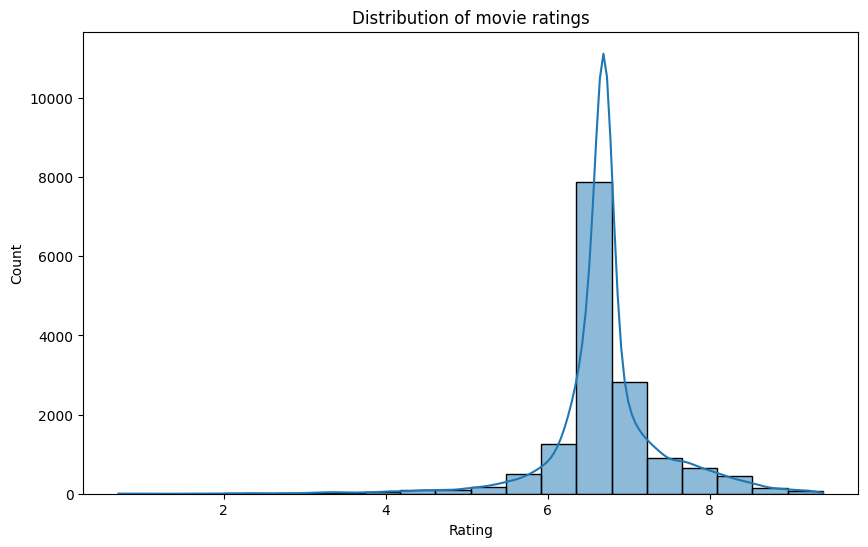

In [53]:
# Histogram of ratings
plt.figure(figsize=(10, 6))
sns.histplot(df["Rating"], bins=20, kde=True)
plt.title("Distribution of movie ratings")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

### 5.1.2 - Distribution of Duration

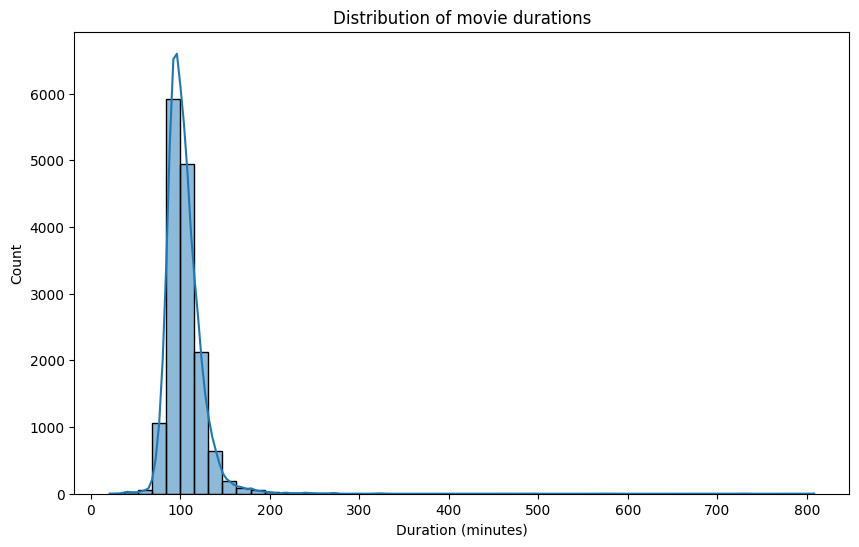

In [54]:
# Histogram of duration
plt.figure(figsize=(10, 6))
sns.histplot(df["Duration in Minutes"], bins=50, kde=True)
plt.title("Distribution of movie durations")
plt.xlabel("Duration (minutes)")
plt.ylabel("Count")
plt.show()

## 5.2 - Evolution of the number of votes

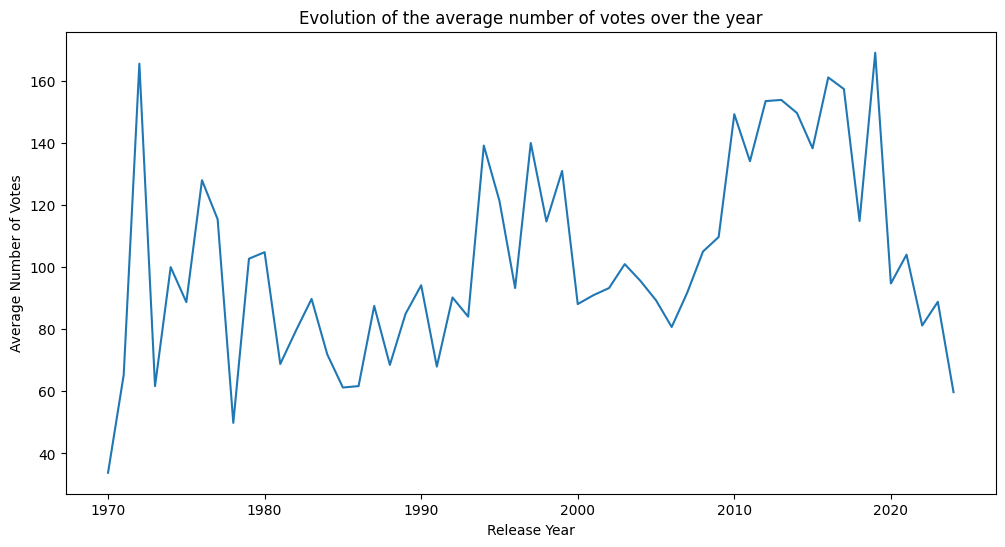

In [55]:
# We extract the year from "Release Date" and we add a new column "Year" in df 
df["Year"] = df["Release Date"].dt.year

# Evolution of the average number of votes over the year
plt.figure(figsize=(12, 6))
sns.lineplot(data=df.groupby("Year")["Nb_Votes"].mean())
plt.title("Evolution of the average number of votes over the year")
plt.xlabel("Release Year")
plt.ylabel("Average Number of Votes")
plt.show()

## 5.3 - Trends in movie ratings over time 

In [56]:
# We group by year and compute the mean of rating
rating_per_year = df.groupby("Year")["Rating"].mean().reset_index()

The chart generated by the code below is an interactive Plotly chart. If you can't see it, the same graph in a non-interactive version is present just after.

In [57]:
# We plot the graph representing the evolution of the ratings attributed to movies by the years
fig = px.line(
    rating_per_year,
    x="Year",
    y="Rating",
    title="Evolution of the ratings attributed to movies by the years",
    markers=True,
    height=600)

fig.update_layout(
    xaxis_title = "Year",
    yaxis_title = "Average Rating")

fig.show()

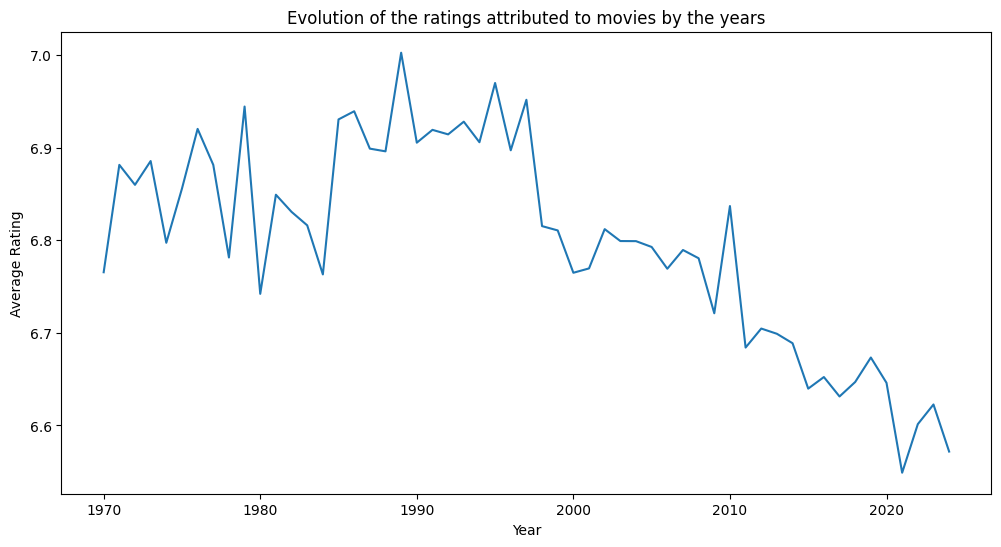

In [58]:
# Evolution of the average rating over the year
plt.figure(figsize=(12, 6))
sns.lineplot(data= df.groupby("Year")["Rating"].mean())
plt.title("Evolution of the ratings attributed to movies by the years")
plt.xlabel("Year")
plt.ylabel("Average Rating")
plt.show()

We have observed a downward trend in film ratings since 1970. However, the trend mentioned does not suggest a correlation because the average grades over each year vary between 6.5 and 7.0, which is very minimal.

Let's see what that looks like by looking at decades.

In [59]:
# We define the limits of the decades
bins = [1969, 1979, 1989, 1999, 2009, 2019, 2029]
labels = ["1970-1979", "1980-1989", "1990-1999", "2000-2009", "2010-2019", "2020-2029"]

# We use pd.cut to create a "Decade" column
df["Decade"] = pd.cut(df["Year"], bins=bins, labels=labels, right=True)

# We group by decade and compute the average rating
rating_per_decade = df.groupby("Decade", observed=False)["Rating"].mean().reset_index()

As before, the chart generated by the code below is an interactive Plotly chart but the same graph in a non-interactive version is present just after.

In [60]:
# We plot the graph representing the evolution of the ratings attributed to movies by the decades
fig = px.line(
    rating_per_decade,
    x="Decade", y="Rating",
    title="Evolution of the ratings attributed to movies by the decades",
    markers=True,
    height=600)

fig.update_layout(
    xaxis_title = "Decade",
    yaxis_title = "Average Rating")

fig.show()

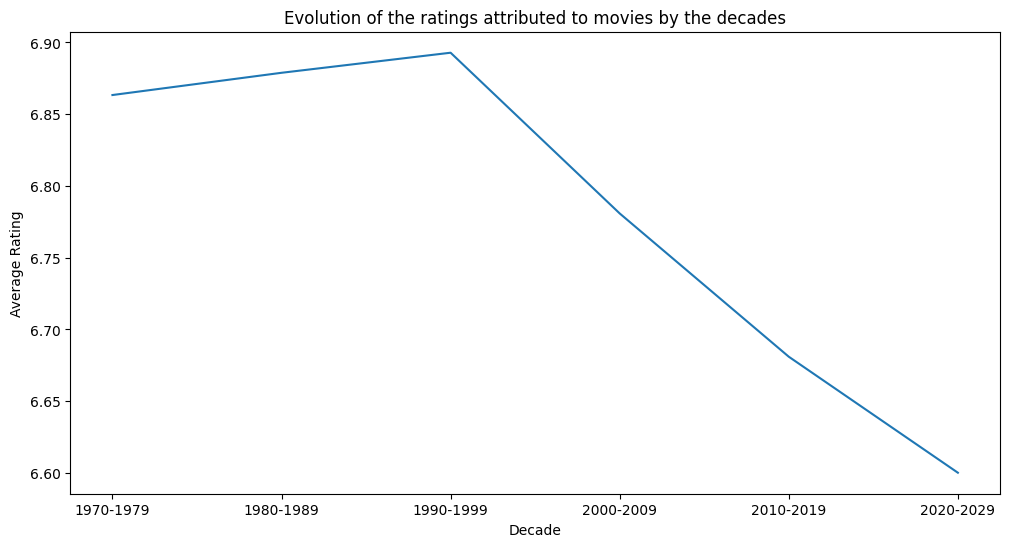

In [61]:
# Evolution of the average number of votes over the year
plt.figure(figsize=(12, 6))
sns.lineplot(data= df.groupby("Decade", observed=False)["Rating"].mean())
plt.title("Evolution of the ratings attributed to movies by the decades")
plt.xlabel("Decade")
plt.ylabel("Average Rating")
plt.show()

The average scores over each decade vary between 6.6 and 6.9, nothing can be deduced from this.

## 5.4 - Analysis of movie genres

### 5.4.1 - Genre popularity all years combined

Let's first look at the average rating obtained for each genre of film, all years combined.

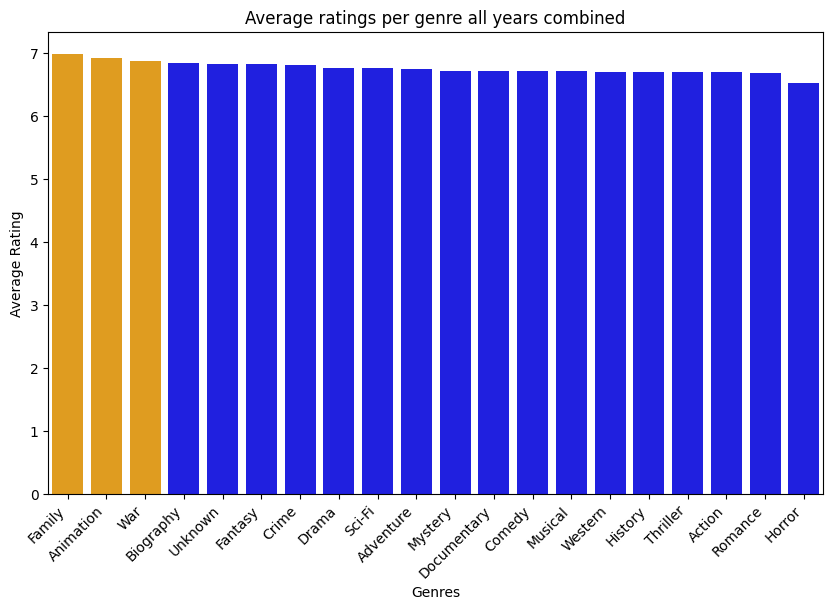

In [62]:
# Calculating the average score by genre
genre_rating_means = df.groupby("Genres")["Rating"].mean().sort_values(ascending=False)

# Color the 3 genres with the best ratings in orange
colors = ['orange' if i < 3 else 'blue' for i in range(len(genre_rating_means))]

# Creation of the barplot
plt.figure(figsize=(10, 6))
sns.barplot(x=genre_rating_means.index,
            y=genre_rating_means.values,
            hue=genre_rating_means.index,
            dodge=False,
            palette=colors,
            legend=False)

plt.ylabel("Average Rating")
plt.xlabel("Genres")
plt.title("Average ratings per genre all years combined")
plt.xticks(rotation=45, ha="right")
plt.show()

No film genre stands out in terms of rating.

### 5.4.2 Genre popularity across decades

In [63]:
# We group by decade and genre and compute the average rating
rating_per_decade_genre = df.groupby(["Decade", "Genres"], observed=False)["Rating"].mean().reset_index()

The chart generated by the code below is an interactive Plotly chart but the screenshots of each decade from this graph are present just after (if the Plotly is not displayed).

In [64]:
# We plot the graph representing the evolution of the ratings attributed to movies by the decades
# Create a figure
fig = go.Figure()

# Add bars for each decade
for decade in rating_per_decade_genre["Decade"].unique():
    # Filter by decade and sort by Rating 
    df_decade = rating_per_decade_genre[rating_per_decade_genre["Decade"] == decade]
    df_decade = df_decade.sort_values(by="Rating", ascending=False)

    # Color the 3 genres with the best ratings in orange
    colors = ["orange" if i < 3 else "blue" for i in range(len(df_decade))]

    fig.add_trace(go.Bar(
        x=df_decade["Genres"],
        y=df_decade["Rating"],
        name=decade,
        visible=False,
        marker_color=colors,
    ))

# Make the first decade visible by default
fig.data[0].visible = True

# Configuring animations
fig.update_layout(
    updatemenus=[{
        "buttons": [
            {
                "label": decade,
                "method": "update",
                "args": [
                    {"visible": [decade == d for d in rating_per_decade_genre["Decade"].unique()]},
                    {"yaxis.range": [0, rating_per_decade_genre[rating_per_decade_genre["Decade"] == decade]["Rating"].max()]}
                ]  
            } for decade in rating_per_decade_genre["Decade"].unique()
        ],
        "direction": "down",
        "showactive": True
    }],
    title="Evolution of the ratings attributed to movies by genres across decades",
    height=600
)

# Edit axis titles
fig.update_layout(
    xaxis_title="Genres",
    yaxis_title="Average Rating" 
)

# Show chart
fig.show()


![80s](Screenshots_Plotly_Charts/Ratings_by_genres_80s.png)

![90s](Screenshots_Plotly_Charts/Ratings_by_genres_90s.png)

![00s](Screenshots_Plotly_Charts/Ratings_by_genres_00s.png)

![10s](Screenshots_Plotly_Charts/Ratings_by_genres_10s.png)

![20s](Screenshots_Plotly_Charts/Ratings_by_genres_20s.png)

### 5.4.3 - Number of movies released by genre all years combined

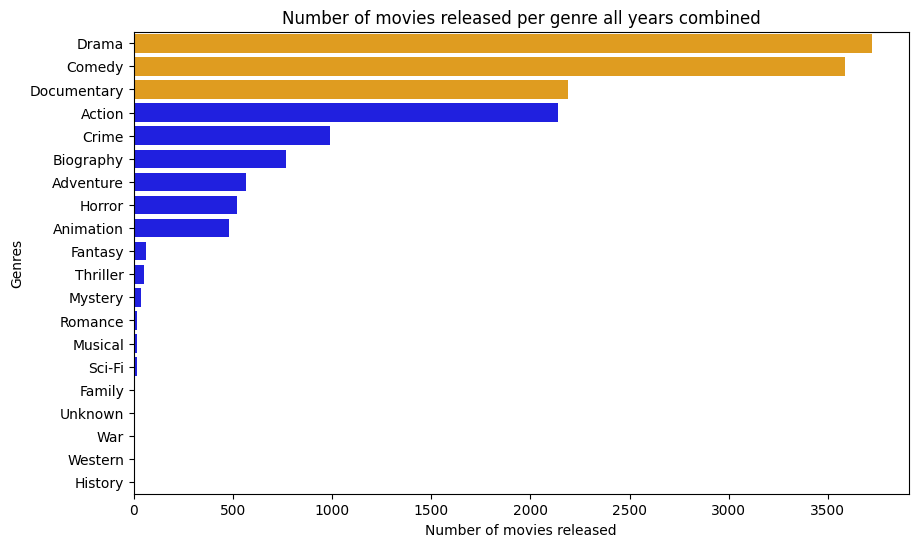

In [65]:
# Calculating the number of movies released by genre
genre_count = df["Genres"].value_counts()

# Color the 3 genres with the most releases in orange
colors = ['orange' if i < 3 else 'blue' for i in range(len(genre_count))]

# Creation of the barplot
plt.figure(figsize=(10, 6))
sns.barplot(x=genre_count.values,
            y=genre_count.index,
            hue=genre_count.index,
            dodge=False,
            palette=colors,
            legend=False)

plt.xlabel("Number of movies released")
plt.ylabel("Genres")
plt.title("Number of movies released per genre all years combined")
plt.show()

All years combined, movie releases are mainly dramas, comedies and documentaries. If we choose not to count documentaries among films, then action films come in third place.

### 5.4.4 Number of films released by genre across decades

In [66]:
# We group by decade and genre and compute the average rating
evolution_per_decade_genre = df.groupby(["Decade", "Genres"], observed=False)["Title"].count().reset_index()
evolution_per_decade_genre.rename(columns={"Title" : "Nb_movies"}, inplace=True)

# Convert "Nb_movies" column in numeric
evolution_per_decade_genre["Nb_movies"] = pd.to_numeric(evolution_per_decade_genre["Nb_movies"], errors="coerce")

The chart generated by the code below is an interactive Plotly chart but the screenshots of each decade from this graph are present just after (if the Plotly is not displayed).

In [67]:
# We plot the graph representing the evolution of the ratings attributed to movies by the decades
# Create a figure
fig = go.Figure()

# Add bars for each decade
for decade in evolution_per_decade_genre["Decade"].unique():
    # Filter by decade and sort by Nb_movies
    df_decade = evolution_per_decade_genre[evolution_per_decade_genre["Decade"] == decade]
    df_decade = df_decade.sort_values(by="Nb_movies")

    # Color the 3 genres with the most releases in orange
    colors = ["orange" if (len(df_decade)-3 <= i <= len(df_decade)) else "blue" for i in range(len(df_decade))]

    fig.add_trace(go.Bar(
        x=df_decade["Nb_movies"],
        y=df_decade["Genres"],
        name=decade,
        visible=False,
        marker_color=colors,
        orientation="h"
    ))

# Make the first decade visible by default
fig.data[0].visible = True

# Configuring animations
fig.update_layout(
    updatemenus=[{
        "buttons": [
            {
                "label": decade,
                "method": "update",
                "args": [
                    {"visible": [decade == d for d in evolution_per_decade_genre["Decade"].unique()]},
                    {
                        "xaxis.range": [0, evolution_per_decade_genre[evolution_per_decade_genre["Decade"] == decade]["Nb_movies"].max()],
                        "yaxis.title.text": "Genres"  # Ensure the y-axis title is maintained
                    }
                ]
            } for decade in evolution_per_decade_genre["Decade"].unique()
        ],
        "direction": "down",
        "showactive": True,
        "x": 0.045,  # Adjust horizontal position (further left)
        "y": 1.10    # Adjust vertical position (above chart)
    }],
    title="Evolution of the number of movies by genres across decades",
    height=600
)

# Edit axis titles
fig.update_layout(
    xaxis_title="Number of movies released",
    yaxis_title="Genres"
)

# Show chart
fig.show()


![70sNb](Screenshots_Plotly_Charts/Nb_movies_by_genres_70s.png)

![80sNb](Screenshots_Plotly_Charts/Nb_movies_by_genres_80s.png)

![90sNb](Screenshots_Plotly_Charts/Nb_movies_by_genres_90s.png)

![00sNb](Screenshots_Plotly_Charts/Nb_movies_by_genres_00s.png)

![10sNb](Screenshots_Plotly_Charts/Nb_movies_by_genres_10s.png)

![20sNb](Screenshots_Plotly_Charts/Nb_movies_by_genres_20s.png)

We notice that the number of movies released increases over the decades.

## 5.5 - Analysis by directors/writers

### 5.5.1 - Calculate the average rating by director and writer as well as the number of films

In [68]:
########## DIRECTOR ##########
# Average rating per director
director_rating = df.groupby("Director")["Rating"].mean().reset_index().sort_values(by="Rating", ascending=False)

# Calcul the number of movies per director
director_counts = df["Director"].value_counts().reset_index()
director_counts.columns = ["Director", "Film_Count"]

# Merge the number of films with the director_rating DataFrame
director_rating = pd.merge(director_rating, director_counts, on="Director")

director_rating.head()

,Director,Rating,Film_Count
0,Agustín Díaz Yanes,9.4,1
1,Casper Andreas,9.3,1
2,Chris Pine,9.3,1
3,Sheldon Wilson,9.3,1
4,Meiert Avis,9.3,1


In [69]:
########## WRITER ##########
# Average rating per writer
writer_rating = df.groupby("Writer")["Rating"].mean().reset_index().sort_values(by="Rating", ascending=False)

# Calcul the number of movies per writer
writer_counts = df["Writer"].value_counts().reset_index()
writer_counts.columns = ["Writer", "Film_Count"]

# Merge the number of films with the writer_rating DataFrame
writer_rating = pd.merge(writer_rating, writer_counts, on="Writer")

writer_rating.head()

,Writer,Rating,Film_Count
0,Agustín Díaz Yanes,9.4,1
1,Ava Ostern Fries,9.3,1
2,Jason Freeland,9.3,1
3,Hunter Hill,9.3,1
4,Peter Mattei,9.3,1


We see that the directors and writers with the best ratings are those who have only one or two films released with a very good rating. Their ratings are therefore not significant.


Let's look at the average ratings of directors and writers by sorting them in descending order of the number of movies released, then for the same number of movies released, in descending order of average rating.

In [70]:
########## TOP DIRECTORS ##########
top_director_rating = df.groupby("Director").agg(
    Rating=("Rating", lambda x: round(x.mean(),1)),
    Film_Count=("Director", "size")
).sort_values(by=["Film_Count","Rating"], ascending=False).reset_index()

top_director_rating.head(10)

,Director,Rating,Film_Count
0,Woody Allen,6.9,42
1,Clint Eastwood,6.9,35
2,Ron Howard,6.8,34
3,Steven Spielberg,7.5,33
4,Steven Soderbergh,6.9,31
5,Spike Lee,6.6,31
6,Martin Scorsese,7.3,29
7,Ridley Scott,7.1,27
8,Barry Levinson,7.0,24
9,Francis Ford Coppola,7.5,22


In [71]:
########## TOP WRITERS ##########

# Filter the dataframe to exclude "Unknown" writers
filtered_df = df[df["Writer"] != "Unknown"]  

top_writer_rating = filtered_df.groupby("Writer").agg(
    Rating=("Rating", lambda x: round(x.mean(),1)),
    Film_Count=("Writer", "size")
).sort_values(by=["Film_Count","Rating"], ascending=False).reset_index()

top_writer_rating.head(10)

,Writer,Rating,Film_Count
0,Woody Allen,6.9,43
1,Stephen King,6.7,36
2,Mark Monroe,6.8,22
3,Luc Besson,6.7,22
4,Tyler Perry,6.6,20
5,Werner Herzog,6.8,19
6,John Hughes,7.2,18
7,David Mamet,7.0,18
8,Michael Crichton,7.0,18
9,Pedro Almodóvar,7.1,17


### 5.5.2 - Analysis of rating distribution

To better understand the distribution of ratings by director and writer, we can visualize the distribution of ratings in the form of boxplots.

Let's look at the 10 directors and writers with the most movies released and best ratings.

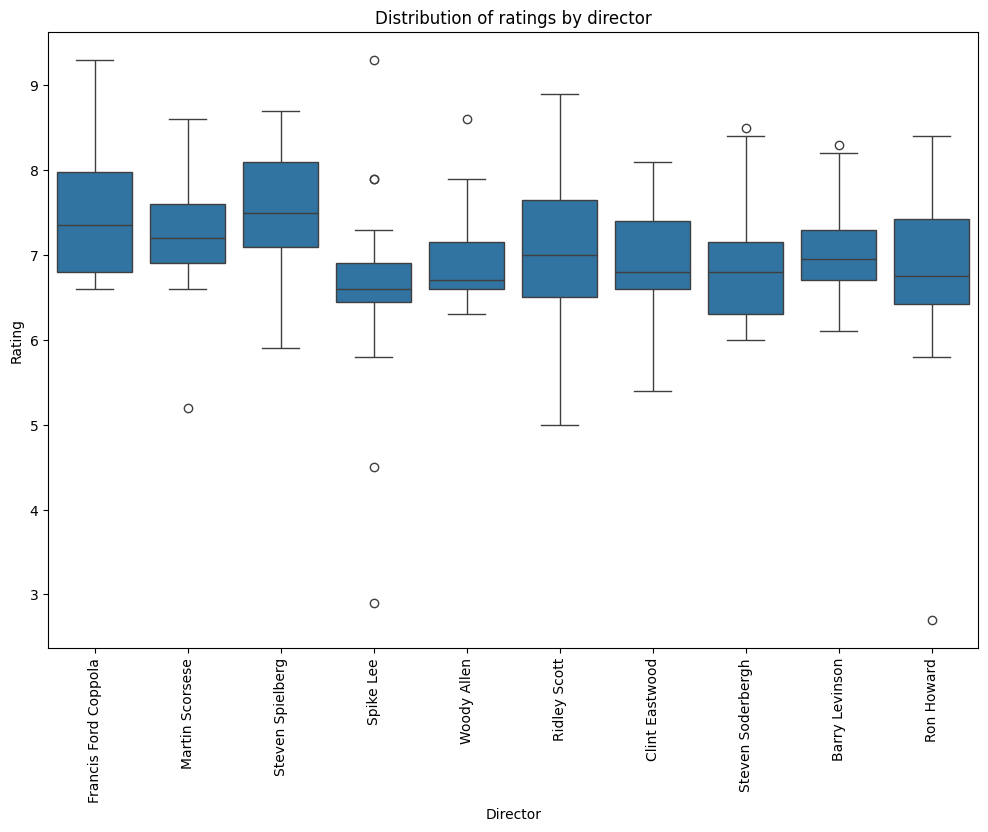

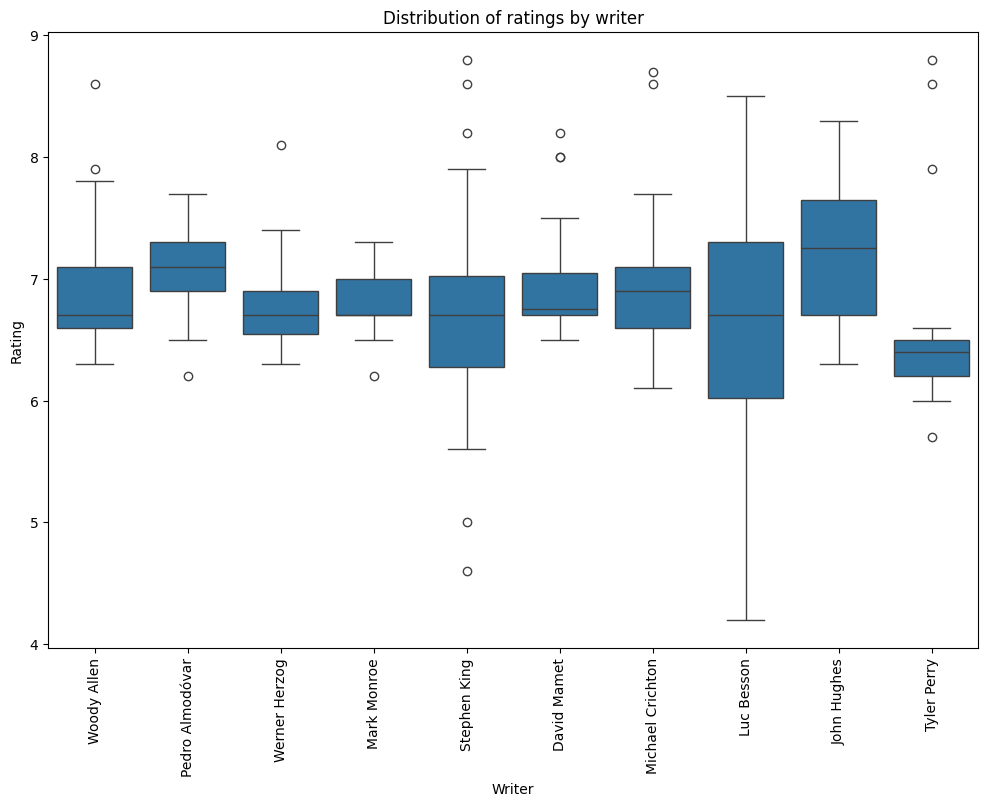

In [72]:
# Boxplot of ratings by director
plt.figure(figsize=(12, 8))
sns.boxplot(data=df[df["Director"].isin(top_director_rating["Director"].head(10))], x="Director", y="Rating")
plt.xticks(rotation=90)
plt.title("Distribution of ratings by director")
plt.show()

# Boxplot of ratings by writer
plt.figure(figsize=(12, 8))
sns.boxplot(data=df[df["Writer"].isin(top_writer_rating["Writer"].head(10))], x="Writer", y="Rating")
plt.xticks(rotation=90)
plt.title("Distribution of ratings by writer")
plt.show()


### 5.5.3 - Analysis of duration distribution

To better understand the distribution of durations by director and writer, we can visualize the distribution of durations in the form of boxplots.

Let's look at the 10 directors and writers with the most movies released and best ratings.

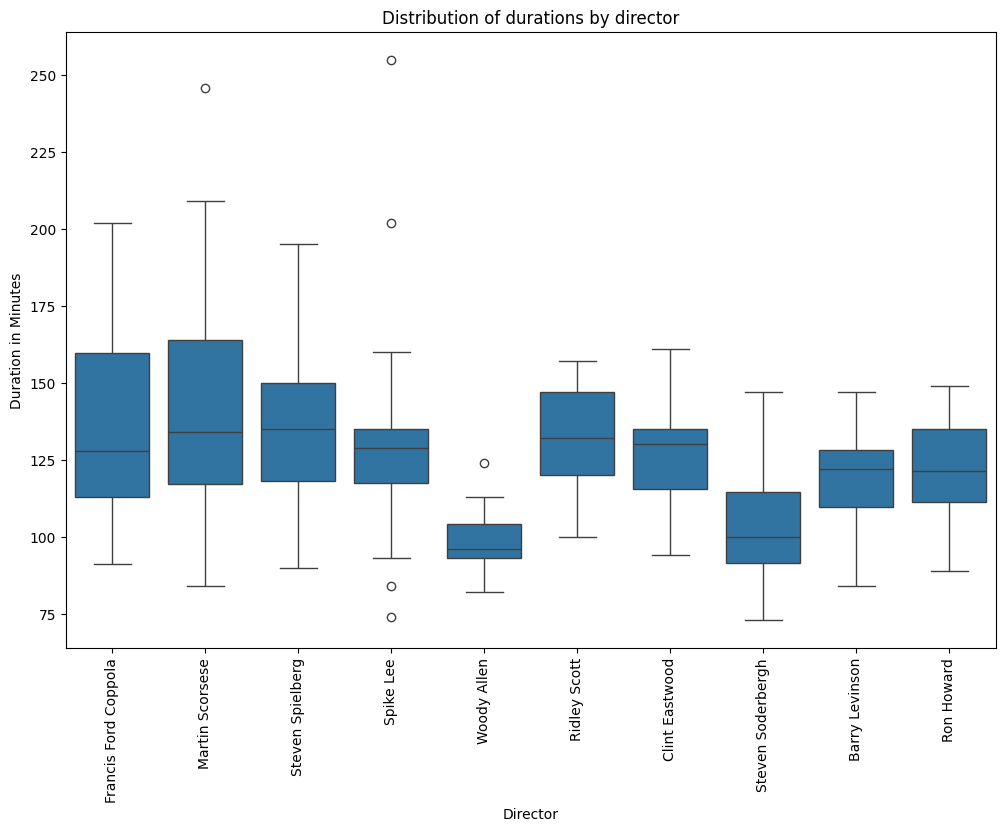

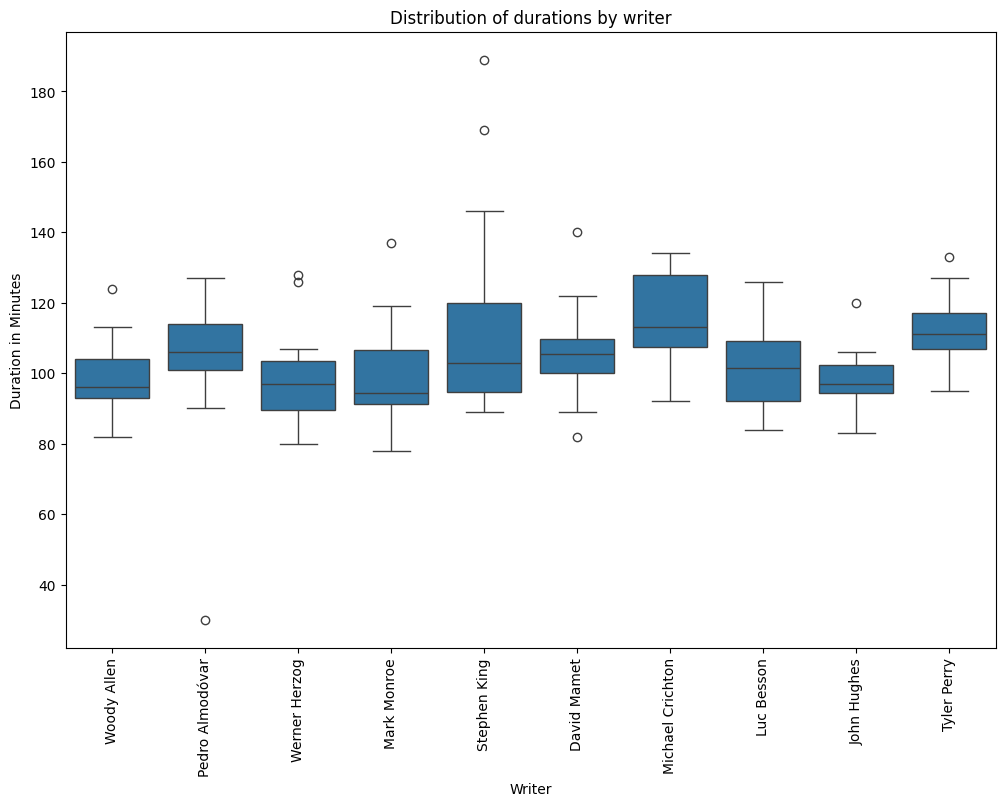

In [73]:
# Boxplot of durations by director
plt.figure(figsize=(12, 8))
sns.boxplot(data=df[df["Director"].isin(top_director_rating["Director"].head(10))], x="Director", y="Duration in Minutes")
plt.xticks(rotation=90)
plt.title("Distribution of durations by director")
plt.show()

# Boxplot of durations by writer
plt.figure(figsize=(12, 8))
sns.boxplot(data=df[df["Writer"].isin(top_writer_rating["Writer"].head(10))], x="Writer", y="Duration in Minutes")
plt.xticks(rotation=90)
plt.title("Distribution of durations by writer")
plt.show()


# 6 - Correlation Analysis

In our dataset, the only continuous numeric variables are “Duration in Minutes” and “Rating”. Let's see if there is a correlation between these two variables.

<Axes: xlabel='Duration in Minutes', ylabel='Rating'>

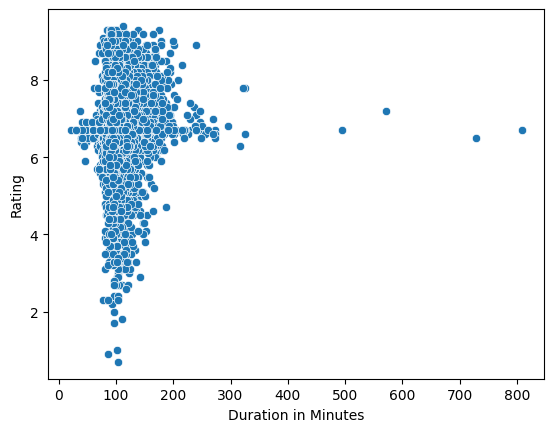

In [74]:
sns.scatterplot(x="Duration in Minutes", y="Rating", data=df)

From the scatter plot above, there doesn't seem to be any correlation between the length and rating of a movie. Let's still look at the Pearson coefficient, taking care to remove outliers because the Pearson correlation coefficient is sensitive to outliers, and a single outlier can significantly change the correlation.

Let's use the interquartile range to exclude outliers. Values ​​outside the range $[Q1 -1.5 \times IQR, Q3 + 1.5 \times IQR]$ are considered outliers.

In [75]:
Durations = df["Duration in Minutes"]
Ratings = df["Rating"]

# Calculation of the IQR to detect outliers
Q1_Durations = Durations.quantile(0.25)
Q3_Durations = Durations.quantile(0.75)
IQR_Durations = Q3_Durations - Q1_Durations

Q1_Ratings = Ratings.quantile(0.25)
Q3_Ratings = Ratings.quantile(0.75)
IQR_Ratings = Q3_Ratings - Q1_Ratings

# Filtering outliers outside IQR ranges
Durations_no_outliers = Durations[(Durations >= (Q1_Durations - 1.5 * IQR_Durations)) & (Durations <= (Q3_Durations + 1.5 * IQR_Durations))]
Ratings_no_outliers = Ratings[(Ratings >= (Q1_Ratings - 1.5 * IQR_Ratings)) & (Ratings <= (Q3_Ratings + 1.5 * IQR_Ratings))]

df_no_outliers = pd.DataFrame({"Durations": Durations_no_outliers, "Ratings": Ratings_no_outliers}).dropna()

# Checking the size of the dataset without outliers to ensure that enough data remains for reliable statistical analysis.
df_no_outliers.shape

(12441, 2)

The dataset contains 12441 rows after removing outliers. Which is sufficient for reliable statistical analysis.

In [76]:
# Calculation of Pearson's correlation coefficient and p-value
pearson_corr, p_value = pearsonr(df_no_outliers["Durations"], df_no_outliers["Ratings"])

# Displaying the result
print(f"The Pearson correlation coefficient between 'Duration in Minutes' and 'Rating' (without outliers) is: {pearson_corr}")
print(f"The p-value associated with this correlation is: {p_value}")

The Pearson correlation coefficient between 'Duration in Minutes' and 'Rating' (without outliers) is: 0.09422453090769123
The p-value associated with this correlation is: 6.143935338389707e-26


Although the correlation is significant (due to the extremely low p-value), the Pearson coefficient is $0.094$, which indicates that there is no real strong or usable linear relationship between a film's length and its rating. These results suggest that the length of a movie is probably not a direct determining factor in its rating.

**Note:** The extremely low p-value is probably due to the large sample size.

# 7 - Download the cleaned dataframe

We download the cleaned dataset to continue the visualization part on the Tableau software.

In [ ]:
df.to_csv("Cleaned_16k_Movies.csv", index=False)

# 8 - Dashboard with Tableau

I built a dashboard on Tableau allowing in-depth exploration of the Cleaned_16k_Movies.csv dataset. Available [here](https://public.tableau.com/shared/85C69C3N7?:display_count=n&:origin=viz_share_link).

# 9 - Conclusion

This film data analysis project covers the evolution of films between 1970 and 2024, with a particular focus on the trend of film ratings, the evolution of genres over the years, and the overall diversity of cinema across directors and screenwriters.

Despite the absence of clear correlations or trends in the dataset, the exploration resulted in an enriched and comprehensive database, thanks to the integration of missing information via the OMDb API and the adjusting movie ratings based on voting volume. The careful data cleaning, along with the transformations applied, resulted in a high-quality dataset, providing a better overview of film distribution based on genres, decades and audience engagement.

The descriptive analyzes carried out with Python and the advanced visualizations in Tableau made it possible to create an interactive dashboard, accessible to a wide audience and allowing in-depth exploration of the dataset. This dashboard provides a clear and intuitive view of the characteristics of films from the last five decades and allows you to navigate through the different dimensions of global cinema.

In conclusion, this analysis highlights the importance of thorough data cleaning to ensure reliable insights and highlights the power of visualization tools to reveal the subtleties and complexity of a field as rich as cinema.

# Author

Thibaut LANNERS